# Natural Language Processing


Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

This notebook borrows heavily from [RealPython](https://realpython.com/nltk-nlp-python/) and Rachel Thomas's [notebook](https://github.com/fastai/course-nlp/blob/master/1-what-is-nlp.ipynb)

## What is NLP?

NLP is a broad field, encompassing a variety of tasks, including:

- Part-of-speech tagging: identify if each word is a noun, verb, adjective, etc.)
- Named entity recognition NER): identify person names, organizations, locations, medical codes, time expressions, quantities, monetary values, etc)
- Question answering
- Speech recognition
- Text-to-speech and Speech-to-text
- Topic modeling
- Sentiment classification
- Language modeling
- Translation

Many techniques from NLP are useful in a variety of places, for instance, you may have text within your tabular data.

The field of NLP is still very much in a state of flux, with best practices changing.

### Norvig vs. Chomsky

This "debate" captures the tension between two approaches:

- modeling the underlying mechanism of a phenomena
- using machine learning to predict outputs (without necessarily understanding the mechanisms that create them)

This tension is still very much present in NLP (and in many fields in which machine learning is being adopted, as well as in approachs to "artificial intelligence" in general).

Background: Noam Chomsky is an MIT emeritus professor, the father of modern linguistics, one of the founders of cognitive science, has written >100 books. Peter Norvig is Director of Research at Google.

From [MIT Tech Review coverage](https://www.technologyreview.com/s/423917/unthinking-machines/) of a panel at MIT in 2011:

"Chomsky derided researchers in machine learning who use purely statistical methods to produce behavior that mimics something in the world, but who don’t try to understand the meaning of that behavior. Chomsky compared such researchers to scientists who might study the dance made by a bee returning to the hive, and who could produce a statistically based simulation of such a dance without attempting to understand why the bee behaved that way. “That’s a notion of scientific success that’s very novel. I don’t know of anything like it in the history of science,” said Chomsky."

From Norvig's response [On Chomsky and the Two Cultures of Statistical Learning](http://norvig.com/chomsky.html):

"Breiman is inviting us to give up on the idea that we can uniquely model the true underlying form of nature's function from inputs to outputs. Instead he asks us to be satisfied with a function that accounts for the observed data well, and generalizes to new, previously unseen data well, but may be expressed in a complex mathematical form that may bear no relation to the "true" function's form (if such a true function even exists). Chomsky takes the opposite approach: he prefers to keep a simple, elegant model, and give up on the idea that the model will represent the data well."

- [Noam Chomsky on Where Artificial Intelligence Went Wrong: An extended conversation with the legendary linguist](https://www.theatlantic.com/technology/archive/2012/11/noam-chomsky-on-where-artificial-intelligence-went-wrong/261637/)
- [Norvig vs. Chomsky and the Fight for the Future of AI](https://www.tor.com/2011/06/21/norvig-vs-chomsky-and-the-fight-for-the-future-of-ai/)

### Yann LeCun vs. Chris Manning

Another interesting discussion along the topic of how much linguistic structure to incorporate into NLP models is between Yann LeCun and Chris Manning:

[Deep Learning, Structure and Innate Priors: A Discussion between Yann LeCun and Christopher Manning](http://www.abigailsee.com/2018/02/21/deep-learning-structure-and-innate-priors.html):

*On one side, Manning is a prominent advocate for incorporating more linguistic structure into deep learning systems. On the other, LeCun is a leading proponent for the ability of simple but powerful neural architectures to perform sophisticated tasks without extensive task-specific feature engineering. For this reason, anticipation for disagreement between the two was high, with one Twitter commentator describing the event as “the AI equivalent of Batman vs Superman”.*

...

*Manning described structure as a “necessary good” (9:14), arguing that we should have a positive attitude towards structure as a good design decision. In particular, structure allows us to design systems that can learn more from less data, and at a higher level of abstraction, compared to those without structure.*

*Conversely, LeCun described structure as a “necessary evil” (2:44), and warned that imposing structure requires us to make certain assumptions, which are invariably wrong for at least some portion of the data, and may become obsolete within the near future. As an example, he hypothesized that ConvNets may be obsolete in 10 years (29:57).*

## Processing Text

Let's start with words as unit of analysis.  Consider this extract from Hamlet:

In [8]:
hamlet = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life."""

### Tokenizing

By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

When you’re analyzing text, you’ll be tokenizing by word and tokenizing by sentence. Here’s what both types of tokenization bring to the table:

- Tokenizing by word: Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. For example, if you were analyzing a group of job ads, then you might find that the word “Python” comes up often. That could suggest high demand for Python knowledge, but you’d need to look deeper to know more.

- Tokenizing by sentence: When you tokenize by sentence, you can analyze how those words relate to one another and see more context. Are there a lot of negative words around the word “Python” because the hiring manager doesn’t like Python? Are there more terms from the domain of herpetology than the domain of software development, suggesting that you may be dealing with an entirely different kind of python than you were expecting?

Here’s how to import the relevant parts of NLTK so you can tokenize by word and by sentence:

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize

hamlet_sents = sent_tokenize(hamlet)
hamlet_words = word_tokenize(hamlet)

In [13]:
len(hamlet_sents)

3

In [14]:
len(hamlet_words)

136

In [16]:
# note that punctuations are 'words'

hamlet_words

['To',
 'be',
 ',',
 'or',
 'not',
 'to',
 'be',
 ',',
 'that',
 'is',
 'the',
 'question',
 ':',
 'Whether',
 "'t",
 'is',
 'nobler',
 'in',
 'the',
 'mind',
 'to',
 'suffer',
 'The',
 'slings',
 'and',
 'arrows',
 'of',
 'outrageous',
 'fortune',
 ',',
 'Or',
 'to',
 'take',
 'arms',
 'against',
 'a',
 'sea',
 'of',
 'troubles',
 'And',
 'by',
 'opposing',
 'end',
 'them',
 '.',
 'To',
 'die—to',
 'sleep',
 ',',
 'No',
 'more',
 ';',
 'and',
 'by',
 'a',
 'sleep',
 'to',
 'say',
 'we',
 'end',
 'The',
 'heart-ache',
 'and',
 'the',
 'thousand',
 'natural',
 'shocks',
 'That',
 'flesh',
 'is',
 'heir',
 'to',
 ':',
 "'t",
 'is',
 'a',
 'consummation',
 'Devoutly',
 'to',
 'be',
 'wish',
 "'d",
 '.',
 'To',
 'die',
 ',',
 'to',
 'sleep',
 ';',
 'To',
 'sleep',
 ',',
 'perchance',
 'to',
 'dream—ay',
 ',',
 'there',
 "'s",
 'the',
 'rub',
 ':',
 'For',
 'in',
 'that',
 'sleep',
 'of',
 'death',
 'what',
 'dreams',
 'may',
 'come',
 ',',
 'When',
 'we',
 'have',
 'shuffled',
 'off',
 'th

### Removing Punctuation

We may want to get rid of punctuations before processing any text.

In [24]:
mortal_coil = """
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life."""

In [25]:
from nltk.tokenize import RegexpTokenizer

punct_remover = RegexpTokenizer(r'\w+')
mortal_coil_tokens = punct_remover.tokenize(mortal_coil)
mortal_coil_tokens

['For',
 'in',
 'that',
 'sleep',
 'of',
 'death',
 'what',
 'dreams',
 'may',
 'come',
 'When',
 'we',
 'have',
 'shuffled',
 'off',
 'this',
 'mortal',
 'coil',
 'Must',
 'give',
 'us',
 'pause',
 'there',
 's',
 'the',
 'respect',
 'That',
 'makes',
 'calamity',
 'of',
 'so',
 'long',
 'life']

### Stop Words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

Here’s how to import the relevant parts of NLTK in order to filter out stop words:

In [18]:
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/pmui/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


You iterated over words_in_quote with a for loop and added all the words that weren’t stop words to filtered_list. You used .casefold() on word so you could ignore whether the letters in word were uppercase or lowercase. This is worth doing because stopwords.words('english') includes only lowercase versions of stop words.

In [26]:
stop_words = set(stopwords.words("english"))
filtered_list = []
for word in mortal_coil_tokens:
    if word.casefold() not in stop_words:
         filtered_list.append(word)

A more fancy way of doing this is with "List Comprehension":

In [27]:
filtered_list = [
    word for word in mortal_coil_tokens if word.casefold() not in stop_words
]

In [28]:
filtered_list

['sleep',
 'death',
 'dreams',
 'may',
 'come',
 'shuffled',
 'mortal',
 'coil',
 'Must',
 'give',
 'us',
 'pause',
 'respect',
 'makes',
 'calamity',
 'long',
 'life']

### Stemming

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

Here’s how to import the relevant parts of NLTK in order to start stemming:

In [32]:
from nltk.stem import PorterStemmer, SnowballStemmer
stemmer = PorterStemmer()
snowball = SnowballStemmer(language="english")

In [33]:
stemmed_words = [stemmer.stem(word) for word in filtered_list]
stemmed_words

['sleep',
 'death',
 'dream',
 'may',
 'come',
 'shuffl',
 'mortal',
 'coil',
 'must',
 'give',
 'us',
 'paus',
 'respect',
 'make',
 'calam',
 'long',
 'life']

In [34]:
stemmed_words = [snowball.stem(word) for word in filtered_list]
stemmed_words

['sleep',
 'death',
 'dream',
 'may',
 'come',
 'shuffl',
 'mortal',
 'coil',
 'must',
 'give',
 'us',
 'paus',
 'respect',
 'make',
 'calam',
 'long',
 'life']

Understemming and overstemming are two ways stemming can go wrong:

- __Understemming__ happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
- __Overstemming__ happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.
The Porter stemming algorithm dates from 1979, so it’s a little on the older side. The Snowball stemmer, which is also called Porter2, is an improvement on the original.  As shown above, they both work pretty much the same way. It’s also worth noting that the purpose of the Porter stemmer is not to produce complete words but to find variant forms of a word.

### Parts of Speech (POS) Tagging

Part of speech is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

| Part of speech	|Role	| Examples |
|-------------------|:------|:---------|
| Noun	|Is a person, place, or thing|	mountain, bagel, Poland	|
| Pronoun	|Replaces a noun|	you, she, we	|
| Adjective	| Gives information about what a noun is like	efficient, windy, colorful	|
| Verb	| Is an action or a state of being	|	learn, is, go	|
| Adverb	| Gives information about a verb, an adjective, or another adverb	|	efficiently, always, very	|
| Preposition	| Gives information about how a noun or pronoun is connected to another word	|	from, about, at	|
| Conjunction	| Connects two other words or phrases	|	so, because, and	|
| Interjection	| Is an exclamation	| yay, ow, wow |
| Article (determiner) | Specific reference | a, an, the |

In [40]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /Users/pmui/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help/tagsets.zip.


In [38]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(stemmed_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pmui/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('sleep', 'JJ'),
 ('death', 'NN'),
 ('dream', 'NN'),
 ('may', 'MD'),
 ('come', 'VB'),
 ('shuffl', 'NN'),
 ('mortal', 'JJ'),
 ('coil', 'NN'),
 ('must', 'MD'),
 ('give', 'VB'),
 ('us', 'PRP'),
 ('paus', 'JJ'),
 ('respect', 'JJ'),
 ('make', 'VB'),
 ('calam', 'NN'),
 ('long', 'JJ'),
 ('life', 'NN')]

### Lemmatization

A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.

For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.

In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.

Here’s how to import the relevant parts of NLTK in order to start lemmatizing:

In [44]:
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /Users/pmui/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pmui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
lemmatizer.lemmatize("flowers")

'flower'

In [51]:
lemmatizer.lemmatize("teaches")

'teach'

In [52]:
lemmatizer.lemmatize("scarves")

'scarf'

In [53]:
lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words]
lemmatized_words

['sleep',
 'death',
 'dream',
 'may',
 'come',
 'shuffl',
 'mortal',
 'coil',
 'must',
 'give',
 'u',
 'paus',
 'respect',
 'make',
 'calam',
 'long',
 'life']

You can control which part of speech the Lemmatizer is using:

In [54]:
lemmatizer.lemmatize("worst") # assume "worst" is a noun

'worst'

In [55]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

The default parameter for pos is 'n' for noun, but you made sure that "worst" was treated as an adjective by adding the parameter pos="a". As a result, you got 'bad', which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because "worst" is the superlative form of the adjective 'bad', and lemmatizing reduces superlatives as well as comparatives to their lemmas.

### Chunking

While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

A phrase is a word or group of words that works as a single unit to perform a grammatical function. Noun phrases are built around a noun.

Here are some examples:

- “A planet”
- “A tilting planet”
- “A swiftly tilting planet”

Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

Before you can chunk, you need to make sure that the parts of speech in your text are tagged, so create a string for POS tagging.

In [56]:
hamlet_pos_tags = nltk.pos_tag(lemmatized_words)
hamlet_pos_tags

[('sleep', 'JJ'),
 ('death', 'NN'),
 ('dream', 'NN'),
 ('may', 'MD'),
 ('come', 'VB'),
 ('shuffl', 'NN'),
 ('mortal', 'JJ'),
 ('coil', 'NN'),
 ('must', 'MD'),
 ('give', 'VB'),
 ('u', 'JJ'),
 ('paus', 'NN'),
 ('respect', 'NN'),
 ('make', 'VBP'),
 ('calam', 'NN'),
 ('long', 'JJ'),
 ('life', 'NN')]

In order to chunk, you first need to define a chunk grammar.

__A chunk grammar__ is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

For this tutorial, you don’t need to know how regular expressions work, but they will definitely come in handy for you in the future if you want to process text.

Create a chunk grammar with one regular expression rule:

In [57]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

According to the rule you created, your chunks:

1. Start with an optional (?) determiner (`DT`)
2. Can have any number (*) of adjectives (`JJ`)
3. End with a noun (`<NN>`)

Create a chunk parser with this grammar:

In [59]:
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(hamlet_pos_tags)

In [61]:
tree.draw()

     |████████████████████████████████| 67 kB 2.7 MB/s eta 0:00:011


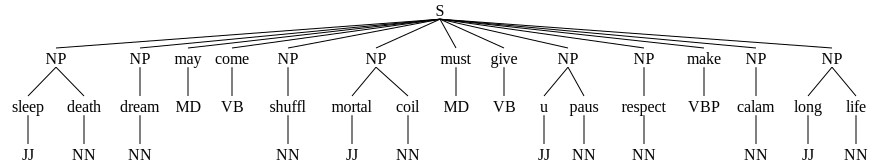

In [64]:
# !pip install svgling
from IPython.display import display
display(tree)

### Chinking

Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

Let's consider more original "Mortal Coil" set of tokens: let's get each token's POS:

In [68]:
mortal_coil_pos = nltk.pos_tag(mortal_coil_tokens)
mortal_coil_pos

[('For', 'IN'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('sleep', 'NN'),
 ('of', 'IN'),
 ('death', 'NN'),
 ('what', 'WP'),
 ('dreams', 'VBZ'),
 ('may', 'MD'),
 ('come', 'VB'),
 ('When', 'WRB'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('shuffled', 'VBN'),
 ('off', 'RP'),
 ('this', 'DT'),
 ('mortal', 'JJ'),
 ('coil', 'NN'),
 ('Must', 'NNP'),
 ('give', 'VB'),
 ('us', 'PRP'),
 ('pause', 'VB'),
 ('there', 'EX'),
 ('s', 'VBZ'),
 ('the', 'DT'),
 ('respect', 'NN'),
 ('That', 'WDT'),
 ('makes', 'VBZ'),
 ('calamity', 'NN'),
 ('of', 'IN'),
 ('so', 'RB'),
 ('long', 'JJ'),
 ('life', 'NN')]

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [69]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{
"""

The first rule of your grammar is {<.*>+}. This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: <.*>+.

The second rule of your grammar is }<JJ>{. This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: <JJ>.

Create a chunk parser with this grammar:

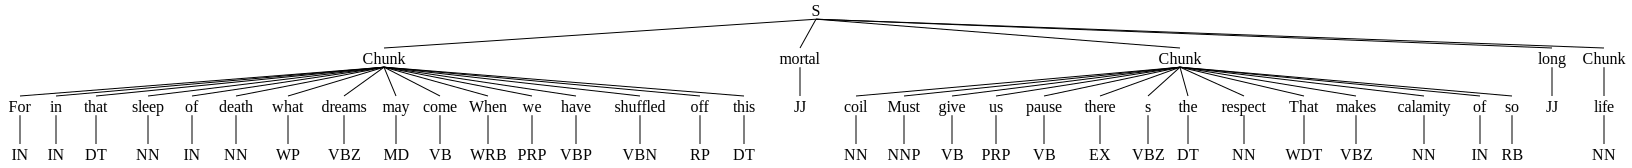

In [70]:
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(mortal_coil_pos)
display(tree)

In this case, ('mortal', 'JJ') was excluded from the chunks because it’s an adjective (JJ). 

Here, you’ve excluded the adjective 'mortal' from your chunks and are left with two chunks containing everything else. The first chunk has all the text that appeared before the adjective that was excluded. The second chunk contains everything after the adjective that was excluded.

## Named Entity Recognition (NER)

Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With __named entity recognition__, you can find the named entities in your texts and also determine what kind of named entity they are.

Here’s the list of named entity types from the NLTK book:

| NE type | Examples     |
|:----------|:-------------|
| ORGANIZATION	| Georgia-Pacific Corp., WHO |
| PERSON	| Eddy Bonte, President Obama |
| LOCATION	| Murray River, Mount Everest |
| DATE	| June, 2008-06-29 |
| TIME	| two fifty a m, 1:30 p.m. |
| MONEY	| 175 million Canadian dollars, GBP 10.40 |
| PERCENT	| twenty pct, 18.75 % |
| FACILITY	| Washington Monument, Stonehenge |
| GPE	| South East Asia, Midlothian |

You can use nltk.ne_chunk() to recognize named entities. 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/pmui/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/pmui/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


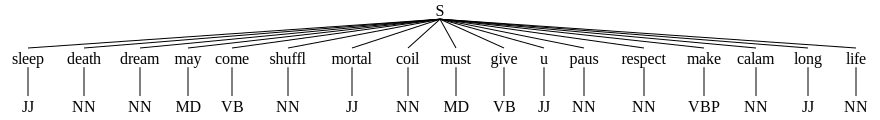

In [72]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(hamlet_pos_tags)
display(tree)

Right!  This sentence does not have any named entity!

Let's try one that does:

In [74]:
biden_sent = """
President Biden has confirmed the rumor 
that the United States will not put boots 
on the ground in Ukraine.
"""

biden_tokens = word_tokenize(biden_sent)
biden_tokens_pos = nltk.pos_tag(biden_tokens)
biden_tokens_pos

[('President', 'NNP'),
 ('Biden', 'NNP'),
 ('has', 'VBZ'),
 ('confirmed', 'VBN'),
 ('the', 'DT'),
 ('rumor', 'NN'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('will', 'MD'),
 ('not', 'RB'),
 ('put', 'VB'),
 ('boots', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('ground', 'NN'),
 ('in', 'IN'),
 ('Ukraine', 'NNP'),
 ('.', '.')]

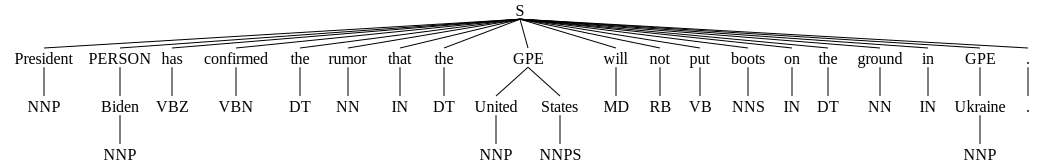

In [76]:
tree = nltk.ne_chunk(biden_tokens_pos)
display(tree)

We can take this one step further and extract named entities directly from your text. Create a string from which to extract named entities. 

In [79]:
def extract_ne(quote, language="english"):
    words = word_tokenize(quote, language=language)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

With this function, you gather all named entities, with no repeats. In order to do that, you tokenize by word, apply part of speech tags to those words, and then extract named entities based on those tags. Because you included binary=True, the named entities you’ll get won’t be labeled more specifically. You’ll just know that they’re named entities.

Here is an example:

In [80]:
extract_ne(biden_sent)

{'Biden', 'Ukraine', 'United States'}

Wow: that's pretty cool!

## Text Corpora NLP

Let's apply what we learned to large text corpora.

In [81]:
nltk.download("book")
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/pmui/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /Users/pmui/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/pmui/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/pmui/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/pmui/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/pmui/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /Users/pmui/nltk_data...
[nltk_data

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Concordance

When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

Let's see how the word "hope" is used in the Inaugural Address Corpus: `text4`

In [82]:
text4.concordance("hope")

Displaying 25 of 120 matches:
ch it might be affected . All I dare hope is that if , in executing this task 
g may be expected , the occasion , I hope , will be admitted as an apology if 
this Government , the world ' s best hope , may by possibility want energy to 
ovide it for themselves . My earnest hope is that Congress will digest some pl
 grateful exultation and in cheering hope . From the experience of the past we
constitutional power . I can not but hope that by the same process of friendly
 the rights of the separate States I hope to be animated by a proper respect f
 . The same diffidence induces me to hope for instruction and aid from the coo
 , did I not permit myself humbly to hope for the sustaining support of an eve
e of apprehension , their enemies of hope . While they foresaw less promptness
ke largely of his confidence , I may hope that somewhat of the same cheering a
ion of which they relied as the last hope of liberty . Without denying that th
cal privileges without

### Dispersion Plot

One can use a dispersion plot to see how much a particular word appears and where it appears.  Let's see how 'hope' is used compared to its (near) synonyms:

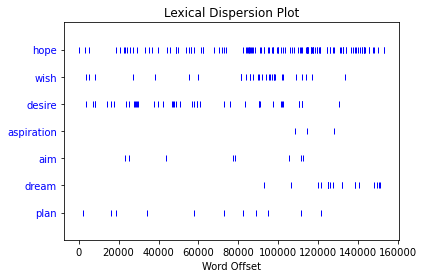

In [83]:
text4.dispersion_plot(["hope", "wish", "desire", "aspiration", "aim", "dream", "plan"])

You use a dispersion plot when you want to see where words show up in a text or corpus. If you’re analyzing a single text, this can help you see which words show up near each other. If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.

Staying on the theme of "hope", let's see how hope is used as prayers in the book of Genesis:

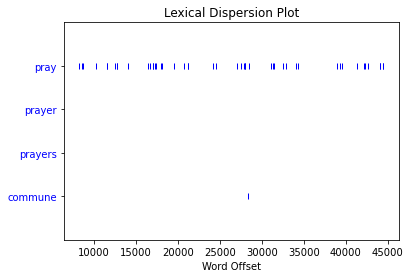

In [84]:
text3.dispersion_plot(["pray", "prayer", "prayers", "commune"])

Hah!  Pray is almost exclusive used without "prayer" or "prayers" in Genesis!  Verbs are more powerful than nouns!

### Frequency Distribution

With a frequency distribution, you can check which words show up most frequently in your text. 

In [85]:
from nltk import FreqDist
frequency_distribution = FreqDist(text4)
print(frequency_distribution)

<FreqDist with 10025 samples and 152901 outcomes>


In [86]:
frequency_distribution.most_common(20)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769),
 ('be', 1505),
 ('is', 1477),
 ('we', 1281),
 ('for', 1141),
 ('by', 1063),
 ('it', 1036),
 ('have', 1029),
 ('which', 1007),
 ('not', 972),
 ('will', 935)]

We have a lot of punctuations & stop words in your frequency distribution: let's remove them.

In [96]:
meaningful_words = [w for w in text4 if w.casefold() not in stop_words and len(w)>2]

In [97]:
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.most_common(20)

[('people', 589),
 ('must', 373),
 ('upon', 365),
 ('Government', 334),
 ('States', 331),
 ('world', 327),
 ('great', 326),
 ('may', 323),
 ('country', 316),
 ('shall', 312),
 ('every', 285),
 ('government', 264),
 ('one', 253),
 ('peace', 251),
 ('nation', 243),
 ('citizens', 241),
 ('new', 241),
 ('America', 240),
 ('power', 237),
 ('public', 224)]

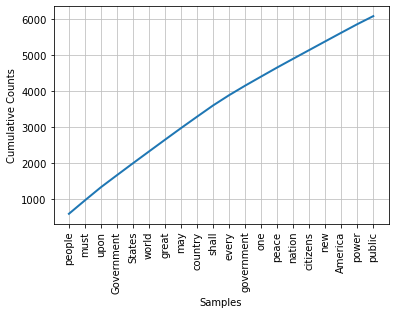

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [98]:
frequency_distribution.plot(20, cumulative=True)

### Collocations

A collocation is a sequence of words that shows up often. Here are some examples of collocations that use the word “tree”:

- Syntax tree
- Family tree
- Decision tree

To see pairs of words that come up often in your corpus, you need to call .collocations() on it:

In [102]:
text4.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


In [104]:
text4.collocation_list()

[('United', 'States'),
 ('fellow', 'citizens'),
 ('years', 'ago'),
 ('four', 'years'),
 ('Federal', 'Government'),
 ('General', 'Government'),
 ('American', 'people'),
 ('Vice', 'President'),
 ('God', 'bless'),
 ('Chief', 'Justice'),
 ('one', 'another'),
 ('fellow', 'Americans'),
 ('Old', 'World'),
 ('Almighty', 'God'),
 ('Fellow', 'citizens'),
 ('Chief', 'Magistrate'),
 ('every', 'citizen'),
 ('Indian', 'tribes'),
 ('public', 'debt'),
 ('foreign', 'nations')]

### Bigrams, Trigrams, Quadgrams

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

- Bigrams: Frequent two-word combinations
- Trigrams: Frequent three-word combinations
- Quadgrams: Frequent four-word combinations

NLTK provides specific classes for you to find collocations in your text. Following the pattern you’ve seen so far, these classes are also built from lists of words:

In [106]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(text4.tokens)

The TrigramCollocationFinder instance will search specifically for trigrams. As you may have guessed, NLTK also has the BigramCollocationFinder and QuadgramCollocationFinder classes for bigrams and quadgrams, respectively. All these classes have a number of utilities to give you information about all identified collocations.

One of their most useful tools is the ngram_fd property. This property holds a frequency distribution that is built for each collocation rather than for individual words.

In [107]:
finder.ngram_fd.most_common(2)

[(('.', 'It', 'is'), 154), (('the', 'United', 'States'), 148)]

In [108]:
finder.ngram_fd.tabulate(2)

          ('.', 'It', 'is') ('the', 'United', 'States') 
                        154                         148 


Let's use the meaningful_words instead:

In [109]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(meaningful_words)

In [110]:
finder.ngram_fd.most_common(3)

[(('Constitution', 'United', 'States'), 19),
 (('people', 'United', 'States'), 12),
 (('preserve', 'protect', 'defend'), 10)]

In [111]:
finder.ngram_fd.tabulate(3)

('Constitution', 'United', 'States')       ('people', 'United', 'States')    ('preserve', 'protect', 'defend') 
                                  19                                   12                                   10 


## Pre-trained Sentiment Analyzer

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

To use VADER, first create an instance of `nltk.sentiment.SentimentIntensityAnalyzer`, then use `.polarity_scores()` on a raw string:

In [113]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pmui/nltk_data...


In [114]:
sia.polarity_scores(biden_sent)

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4215}

Let's analyze some tweets available from nltk.  We will use the .polarity_scores() function of  SentimentIntensityAnalyzer instance to classify tweets:

In [116]:
nltk.download('twitter_samples')
tweets = nltk.corpus.twitter_samples.strings()

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/pmui/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [119]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

In [122]:
shuffle(tweets)
for tweet in tweets[:20]:
    print(">", is_positive(tweet), tweet)

> True @ogyungmaya okay but who gets to see him in the morning?? That's  right i do :-))
> False Its 6:15 and I'm wide awake :(
> True Good morning! And happy Friday! :-) Thought I'd quickly say hello while my little pebble is engrossed in Bing... http://t.co/u73W4nOsjt
> False RT @StaffordPatient: Stafford NHS the model for Tory England? @Save_St_Helier @SaveTheAlex @savehfhospitals @999CallforNHS #ge2015 #nhs htt…
> False Am I the one whos dont see sinse to trend something like thats? :( #ZaynIsComingBackOnJuly26
> False RT @SceptiGuy: Once again, #Farage demostrates that underneath that bluff exterior there hides a humourless fuckwit. https://t.co/R73miiG66R
> False RT @ryan_murton: #AskNigelFarage The reality is that everyone will look back in 2025 and say "Farage was right all along"
> True RT @OddMiliband: Ed Miliband trying to fit in http://t.co/SiRoTq8wes
> False RT @NPickavance: FT backs Tories! Who'd have guessed that FT leader writer Jonathan Ford was photod posing nxt to Bo